In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator

In [2]:
df = pd.read_csv("../Mental health 2023./CSV/share-with-alcohol-and-substance-use-disorders 1990-2016.csv")
df.shape

(6156, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Entity                                                                                 6156 non-null   object 
 1   Code                                                                                   5292 non-null   object 
 2   Year                                                                                   6156 non-null   int64  
 3   Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [4]:
#count, mean, standard deviation, minimum, and quartiles for each numerical column.
df.describe()

,Year,Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)
count,6156.000000,6156.000000
mean,2003.000000,2.311523
std,7.789514,0.910629
min,1990.000000,1.196984
25%,1996.000000,1.651095
50%,2003.000000,2.054947
75%,2010.000000,2.618732
max,2016.000000,6.933015


In [5]:
# check for missing values
df.isnull().sum()

Entity                                                                                     0
Code                                                                                     864
Year                                                                                       0
Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)      0
dtype: int64

In [6]:
#unique values
df.nunique()

Entity                                                                                    228
Code                                                                                      196
Year                                                                                       27
Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)    6156
dtype: int64

In [7]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"Zakres lat: {min_year} - {max_year}")


Zakres lat: 1990 - 2016


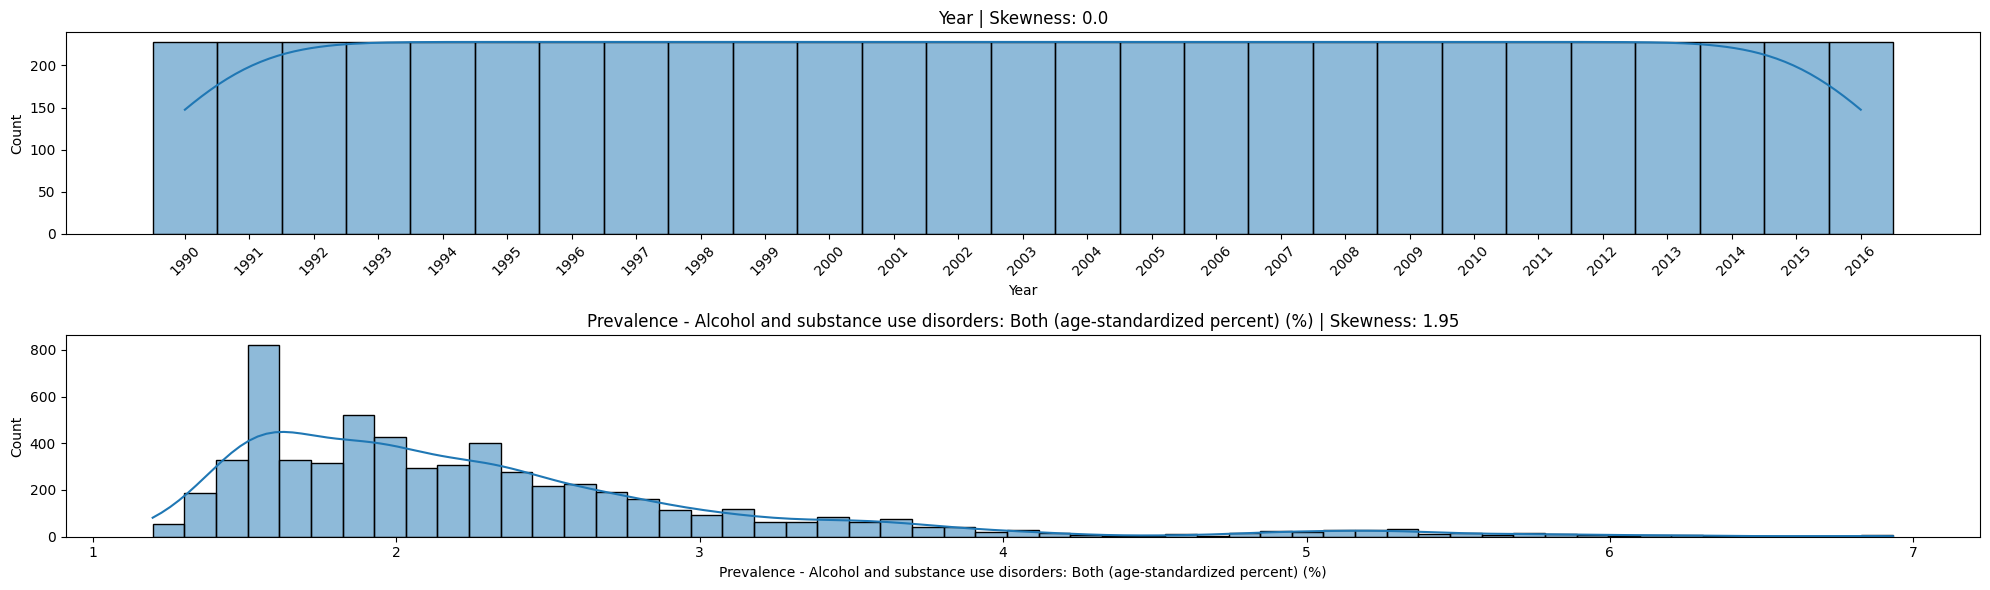

In [8]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    if feature == 'Year':
        sns.histplot(df[feature].dropna(), kde=True, discrete=True)
        unique_years = df['Year'].dropna().sort_values().unique()  
        plt.xticks(unique_years, rotation=45) 
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()
